In [72]:
import os
import numpy as np
import imageio
import matplotlib
import matplotlib.pyplot as plt

# PATHS TO TRAIN/TEST DATA
data_path = '../data/human_annotation/'
image_path = data_path + 'reference/CIR/'
auto_path = data_path +  'reference/GT/'
human_path = data_path + 'annotated/'

tiles_total = len(os.listdir(human_path))

# USE CIR OR RGB DATA
PlotSize = 8                                     # Size of plots
matplotlib.rcParams['figure.figsize'] = [PlotSize*2, PlotSize] 
patch_size = 512

CMAP = matplotlib.colors.ListedColormap(['black', 'white', 'orange']) 

In [5]:
def read_singlechannel(root_folder):

    file_list = os.listdir(root_folder)
    image_list = []
        
    for file in file_list:
        patch = imageio.imread(root_folder + file).astype(np.uint8)
            
        h, w = patch.shape[:2]
        num_samples = h*w
        image_list.append(patch[:,:].reshape((num_samples)))
        del patch
        
    images = np.concatenate(image_list, axis=0)

    ########################################################## 
    return images

In [24]:
def read_multichannel(root_folder):

    file_list = os.listdir(root_folder)
    image_list = []
        
    for file in file_list:
        patch = imageio.imread(root_folder + file).astype(np.uint8)
            
        h, w = patch.shape[:2]
        num_samples = h*w
        image_list.append(patch[:,:,:])
        del patch
    
    images = np.stack(image_list, axis=0)
    #images = np.concatenate(image_list, axis=0)

    ########################################################## 
    return images

In [25]:
human = read_singlechannel(human_path)
auto =  read_singlechannel(auto_path)
image = read_multichannel(image_path)

In [26]:
image.shape

(13, 512, 512, 3)

In [76]:
def plot_single(img, gt_a, gt_h, size):
    plt.figure(facecolor='white')
    
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('NIR Red Green composite')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gt_a.reshape((size,size)), CMAP)
    plt.title('Automatic Annotation')
    plt.axis('off')
        
    plt.subplot(1, 3, 3)
    plt.imshow(gt_h.reshape((size,size)), CMAP)
    plt.title('Human Annotation')
    plt.axis('off')

In [60]:
def plot(img, gt_a, gt_h, size, num_of_tiles):
    
    # Split the datasets into tiles
    img_list =  np.split(img,  num_of_tiles)
    gt_a_list = np.split(gt_a, num_of_tiles)
    gt_h_list = np.split(gt_h, num_of_tiles)

    for i in range(num_of_tiles):
        img_list[i] = img_list[i].reshape(size, size, 3)
        plot_single(img_list[i], gt_a_list[i], gt_h_list[i], size)

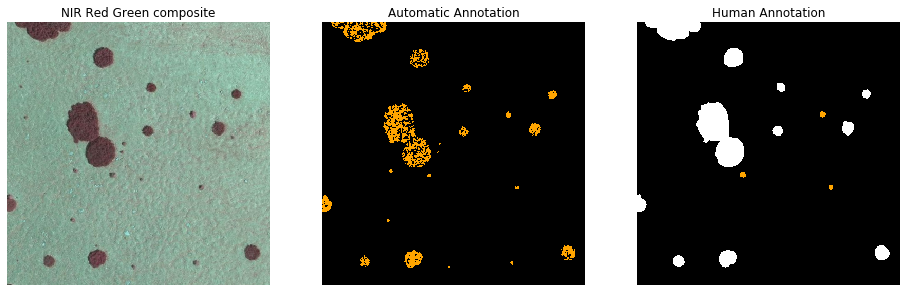

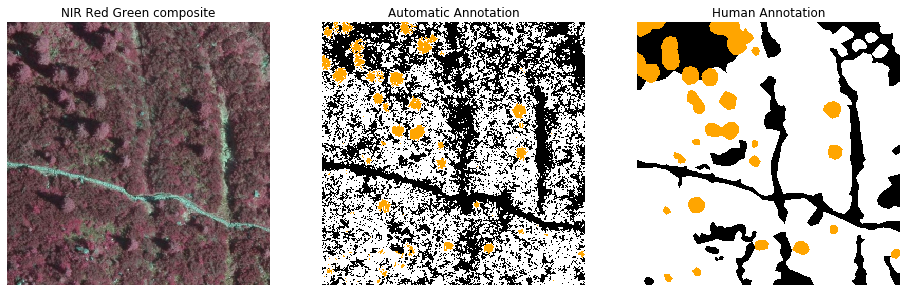

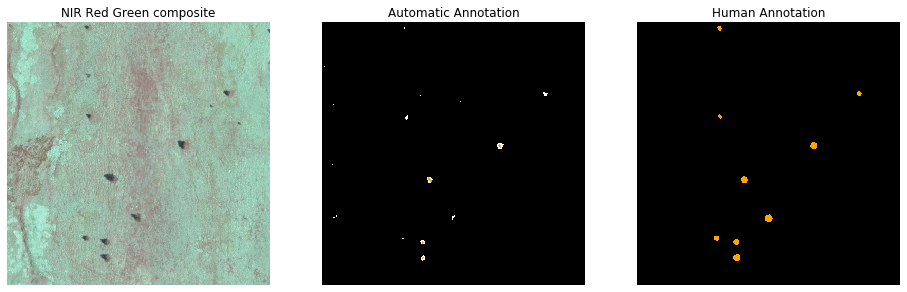

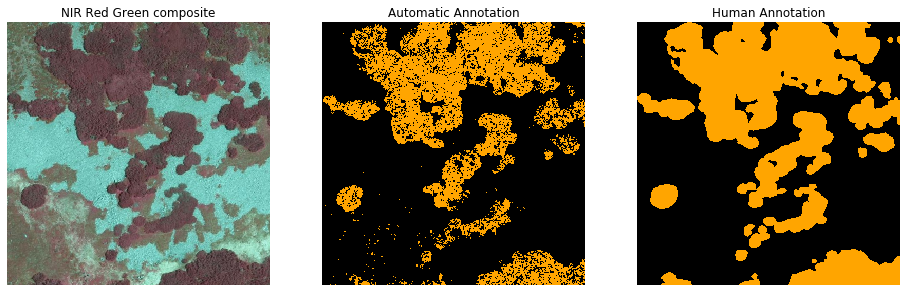

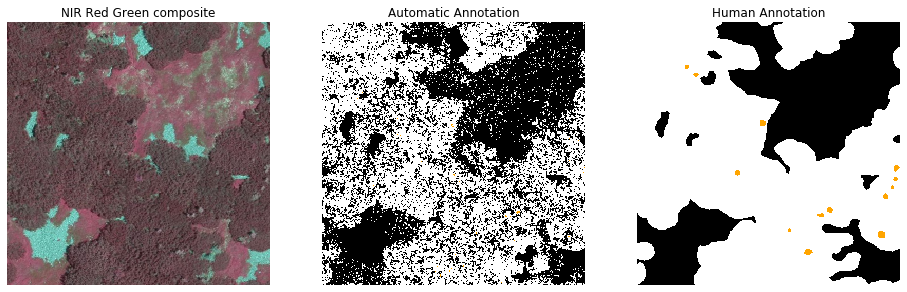

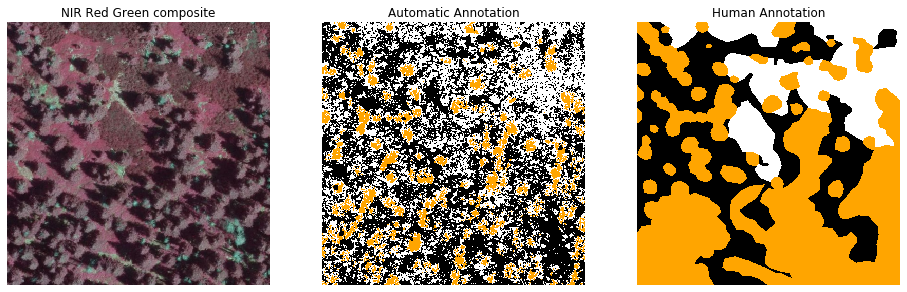

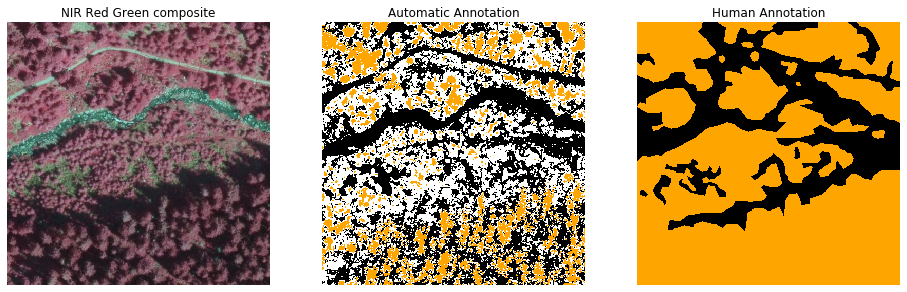

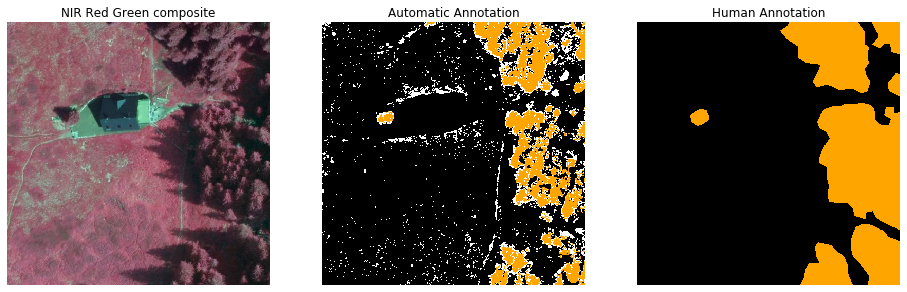

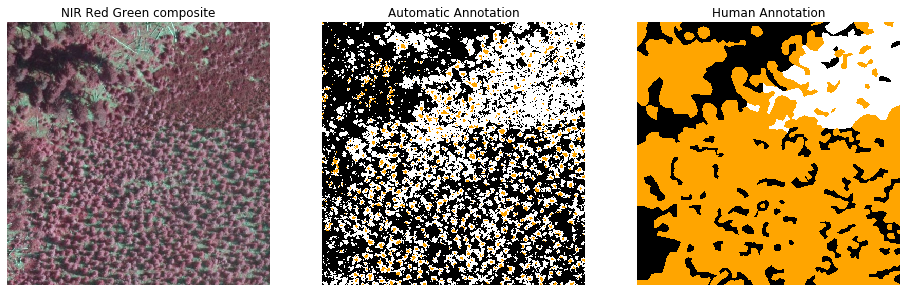

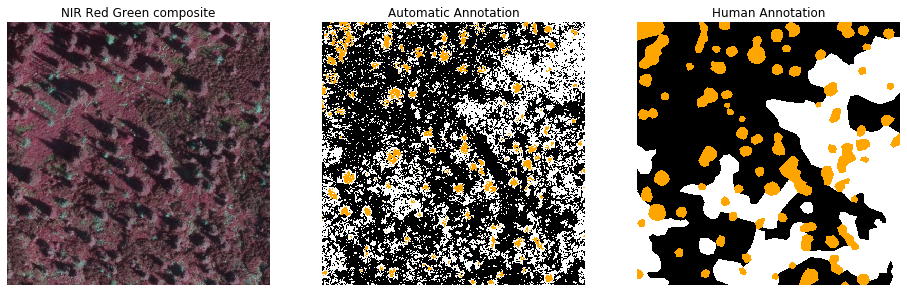

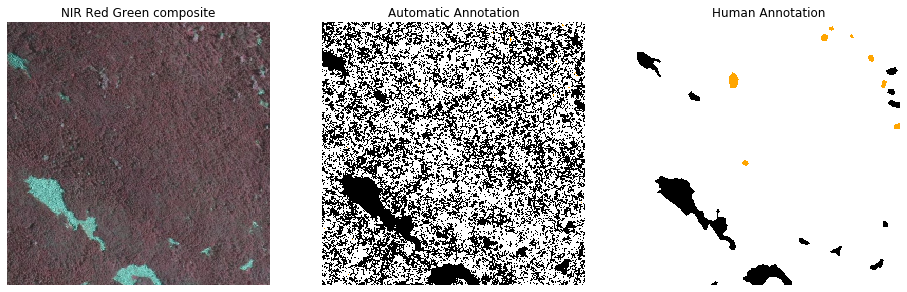

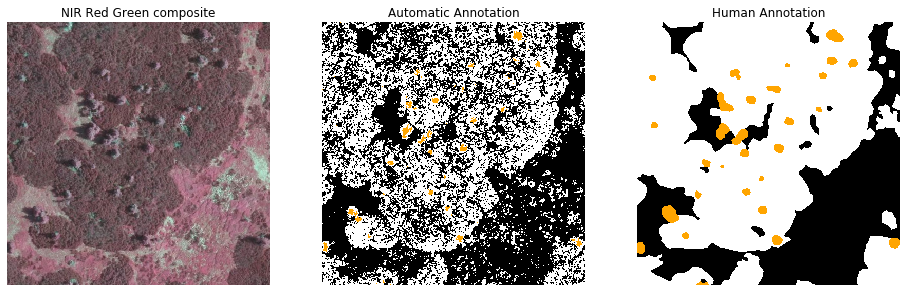

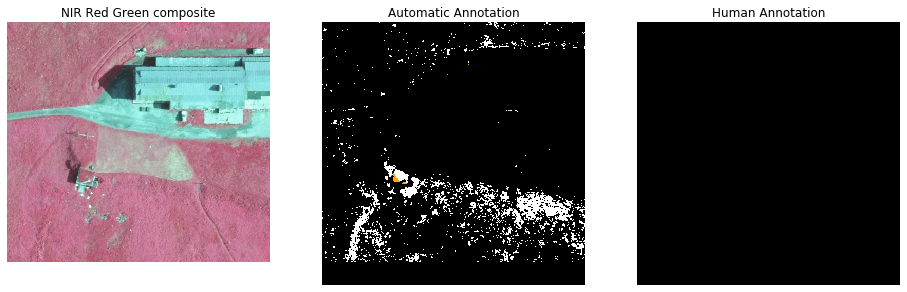

In [77]:
plot(image, auto, human, patch_size, tiles_total)